Sprawozdanie ma format eksportowanego do kody Latex notatnika Jupyter z komentarzami w formacie Markdown, ponieważ mając zapisany notatnik z komentarzami na repozytorium, łatwiej będzie w przyszłości mi z niego skorzystać. Gdyby jednak preferował Pan tradycyjną formę sprawozdania, proszę o taką informację. Cały kod z zajęć można znaleźć również na moim repozytorium: https://github.com/bartek3012/Wielowymiarowe

## Laboratorium 2. - Estymacja wybranych parametrów sygnałów wielowymiarowych

Jako pierwsza grupa laboratoryjna praca odbywała się na podstawie zadań pisanych na tablicy.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Pierwszym punktem ćwiczenia była generacja sinusoidalnego sygnału: 
$x_{t}$, gdzie A=N(0,1) 
oraz cosinisoidalnego sygnału:
$v_{t}$, gdzie B=N(1,1). 
Ponadto $\phi$ = N(0, 0.1)
Wygenerowano po 100 przebiegów dla różnych wartości A oraz B.

Zapis N(0,1) określa liczbę losową z rozkładu normalnego o wartości oczekiwanej 0 i odchyleniu standardowym 1.

In [2]:
t = np.arange(0,4*np.pi,0.05)   # start,stop,step
omega = 1

mu_A, sigma_A = 0, 1 # mean and standard deviation

A = np.random.normal(mu_A, sigma_A, 10000)
fi = np.random.normal(0, 0.1, 10000)

mu_B, sigma_B = 1, 1 # mean and standard deviation
B = np.random.normal(mu_B, sigma_B, 10000)
pi = np.random.normal(0, 0.1, 10000)

In [3]:
number_of_t_elements = len(t)

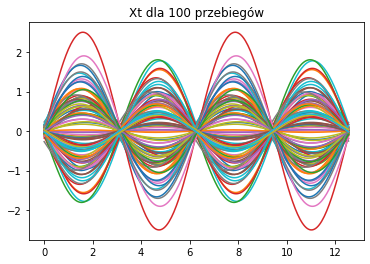

In [4]:
times = 100
for i in range(times):
    x_t = A[i]*np.sin(t*omega+fi[i])
    plt.plot(t,x_t)
plt.title(f'Xt dla {times} przebiegów')
plt.show()

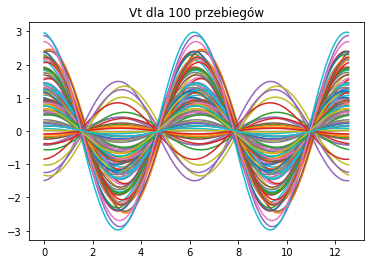

In [5]:
times = 100
for i in range(times):
    v_t = B[i]*np.cos(t*omega+pi[i])
    plt.plot(t,v_t)
plt.title(f'Vt dla {times} przebiegów')
plt.show()

Następnie policzono średnią z 1000 przebiegów. Mimo uśrednienia wartości przebiegi zachowały sinusoidalny kształt. Wynika z tego, że przebiegi w przeciw fazie nie zdołały uśrednić przebiegu do linii prostej.

Text(0.5, 1.0, 'Xt średnia z 10000 przebiegów')

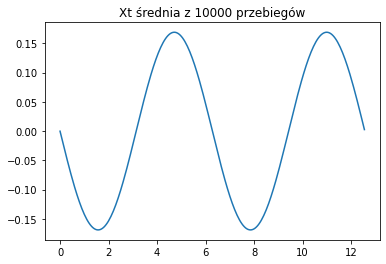

In [6]:
times = 10000
x = A[0]*np.sin(t*omega+fi[0])
for i in range(1, times):
    x = A[i]*np.sin(t*omega+fi[i])
x = x/10
plt.plot(t, x)
plt.title(f'Xt średnia z {times} przebiegów')

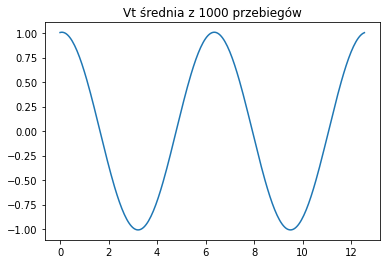

In [7]:
times = 1000
y = B[0]*np.cos(t*omega+pi[i])
for i in range(1, times):
     y = B[i]*np.cos(t*omega+pi[i])
x = x/10
plt.title(f'Vt średnia z {times} przebiegów')
plt.plot(t, y)

Kolejnynm punktem było wyliczenie średniej ze 1000 przebiegów bez sinusa (signały stałe).

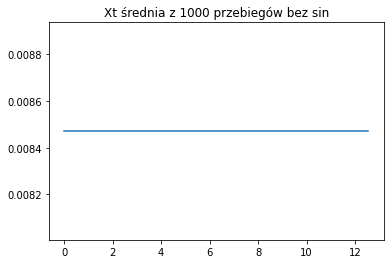

In [8]:
times = 1000
# x = A[0]*np.sin(t*omega+fi[0])
x = np.array([A[0]]*number_of_t_elements)
for i in range(1, times):
    #x = A[i]*np.sin(t*omega+1)
    x = x + np.array([A[i]]*number_of_t_elements)

x = x/times
plt.plot(t, x)
plt.title(f'Xt średnia z {times} przebiegów bez sin')
plt.show()

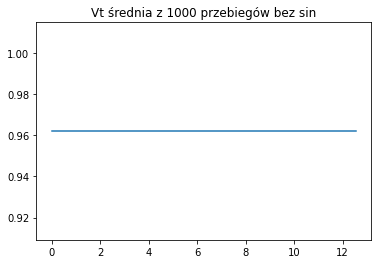

In [9]:
times = 1000
x = np.array([B[0]]*number_of_t_elements)
for i in range(1, times):
    x = x + np.array([B[i]]*number_of_t_elements)
x = x/times
plt.plot(t, x)
plt.title(f'Vt średnia z {times} przebiegów bez sin')
plt.show()

Wraz ze zwiększaniem liczby iteracji wartośc średnia zbliżała się do wartości oczekiwanej. Aby to potwierdzić wygenerowano kolejne wykresy zależności wartości średniej sygnałów w zależności od ilości przebiegów.

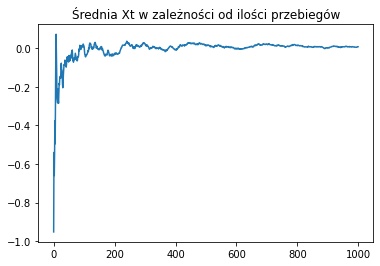

In [10]:
mean = np.zeros(times)
for i in range(times):
    mean[i] = A[:i+1].mean()      
plt.plot(np.arange(times), mean)
plt.title(f'Średnia Xt w zależności od ilości przebiegów')
plt.show() 

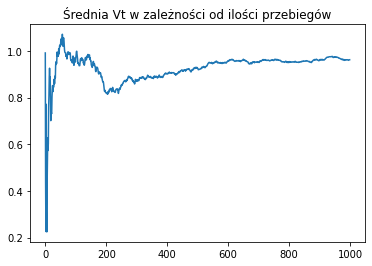

In [11]:
mean = np.zeros(times)
for i in range(times):
    mean[i] = B[:i+1].mean()      
plt.plot(np.arange(times), mean)
plt.title(f'Średnia Vt w zależności od ilości przebiegów')
plt.show() 

Dodatkowo wykonano analogiczne wykresy dla wariancji:

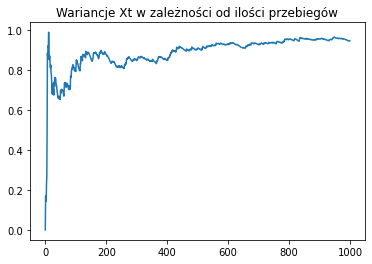

In [12]:
var1 = np.zeros(times)
for i in range(times):
    var1[i] = A[:i+1].var()      
plt.plot(np.arange(times), var1)
plt.title(f'Wariancje Xt w zależności od ilości przebiegów')
plt.show() 

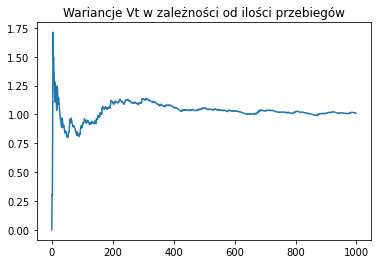

In [13]:
var1 = np.zeros(times)
for i in range(times):
    var1[i] = B[:i+1].var()      
plt.plot(np.arange(times), var1)
plt.title(f'Wariancje Vt w zależności od ilości przebiegów')
plt.show() 

### Wnioski
W przypadku sygnału sinusoidalnego o wartości oczekiwanej równej zero, suma przebiegów znacząco zmniejsza amplitudę sygnału, czyli sygnał zbliża się do wartości oczekiwanej w całym przebiegu. W przypadku cosinusoidalnego przebiegu o wartości oczekiwanej 1 wartości amplitudy w przeciwfazie nie są w stanie zniwelować wpływu dodatnich amplitud i średnia charakterystyka ma znacznie większa amplitudę.

Badając sygnału stałe możemy stwierdzić, że wraz ze wzrostem ilości sygnałów ich średnia zbliża się do wartości zadanej. Wariancja natomiast rośnie do osiągnięcia zadanej wartości.